In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# custom seaborn plot options to make the figures pretty
sns.set(color_codes=True, style='white', context='talk', font_scale=1)
PALETTE = sns.color_palette("Set1")

# *K*-Sample Tests

## Multivariate Nonparametric *K*-Sample Tests

The *k*-sample testing problem can be defined as follows: Consider random variables $X_1, X_2, \ldots, X_k$ that have densities $F_1, F_2, \ldots, F_k$. We are testing,

\begin{align*}
H_0:\ &F_1 = F_2 = \ldots F_k \\
H_A:\ &\exists \ j \neq j' \text{ s.t. } F_j \neq F_{j'}
\end{align*}

Some import things to note:

  - 2-sample Dcorr is equivalent to Energy
  - *k*-sample Dcorr is equivalent to DISCO
  - 2-sample Hsic is equivalent to MMD

This formulation of multivariate nonparametric *k*-sample testing reduces the *k*-sample testing problem to the independence testing problem and then uses the tests in the independence module of `hyppo`.  `hyppo` provides an easy-to-use structure to use tests such as these.

Importing tests from `hyppo` is similar to importing functions/classes from other packages. `hyppo` also has a `sims` module, which contains several linear and nonlinear dependency structures to test the cases for which each test will perform best.

In [2]:
from hyppo.ksample import KSample
from hyppo.sims import linear, rot_2samp, gaussian_3samp

First, let's generate some simulated data. The *k*-sample simulations included take on required parameters an independence simulation from the the `sims` module, number of samples, and number of dimensions with optional paramaters mentioned in the [reference](https://hyppo.neurodata.io/reference/sims.html#ksample-simulations) section of the docs. Looking at some linearly distributed data first, let's look at 100 samples of noisey data and generate a 2-dimensional simulation that is rotated by 60 degrees (a 1000 sample of no noise simulated data shows the trend in the data).

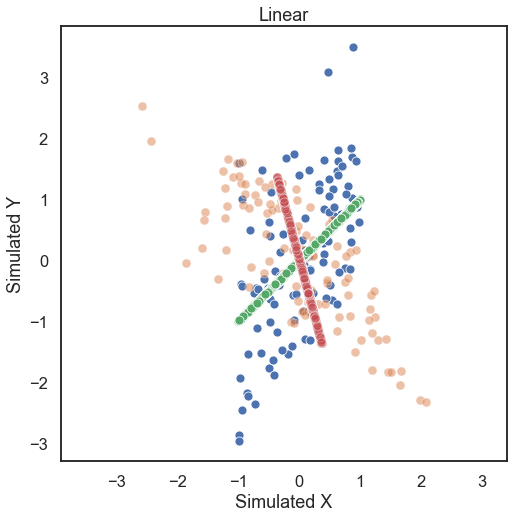

In [3]:
# hyppo code used to produce the simulation data
samp1, samp2 = rot_2samp(linear, 100, 1, degree=60, noise=True)
samp1_no_noise, samp2_no_noise = rot_2samp(linear, 1000, 1, degree=60, noise=False)


# stuff to make the plot and make it look nice
fig = plt.figure(figsize=(8,8))
ax = sns.scatterplot(samp1[:, 0], samp1[:, 1])
ax = sns.scatterplot(samp2[:, 0], samp2[:, 1], alpha=0.5)
ax = sns.scatterplot(samp1_no_noise[:, 0], samp1_no_noise[:, 1])
ax = sns.scatterplot(samp2_no_noise[:, 0], samp2_no_noise[:, 1], alpha=0.5)
ax.set_xlabel('Simulated X')
ax.set_ylabel('Simulated Y') 
plt.title("Linear")
plt.axis('equal')
plt.show()

The test statistic the p-value is calculated by running the `.test` method. Some important parameters for the `.test` method:

  - `indep_test`: This is a required parameter which is a string corresponding to the name of the class for which the non-parametric independence test will be run
  - `reps`: The number of replications to run when running a permutation test
  - `workers`: The number of cores to parallelize over when running a permutation test

The last two parameters are equivalent to and work the same as those in the `independence` module. Note that when using a permutation test, the lowest p-value is the reciprocal of the number of repetitions. Also, since the p-value is calculated with a random permutation test, there will be a slight variance in p-values with subsequent runs.

In [4]:
# test statistic and p-values can be calculated for MGC, but a little slow ...
stat, pvalue = KSample("Dcorr").test(samp1, samp2)

print("Energy test statistic:", stat)
print("Energy p-value:", pvalue)

Energy test statistic: 0.04436470736551818
Energy p-value: 0.001


In [5]:
# so fewer reps can be used, while giving a less confident p-value ...
stat, pvalue = KSample("Dcorr").test(samp1, samp2, reps=100)

print("Energy test statistic:", stat)
print("Energy p-value:", pvalue)

Energy test statistic: 0.04436470736551818
Energy p-value: 0.01


/Users/sampan501/workspace/hyppo/hyppo/_utils.py:67: RuntimeWarning: The number of replications is low (under 1000), and p-value calculations may be unreliable. Use the p-value result, with caution!
  warnings.warn(msg, RuntimeWarning)


In [6]:
# or the parallelization can be used (-1 uses all cores)
stat, pvalue = KSample("Dcorr").test(samp1, samp2, workers=-1)

print("Energy test statistic:", stat)
print("Energy p-value:", pvalue)

Energy test statistic: 0.04436470736551818
Energy p-value: 0.001


We see that Energy is able to detect linear relationships very easily (p-value is less than the alpha level of 0.05).

It is easy to use our *k*-sample tests for 3 samples as well. Let's look at some random multivariate Gaussian simulations. Case 3 is when all Gaussians are moving away from the origin according to the `epsilon` parameter.

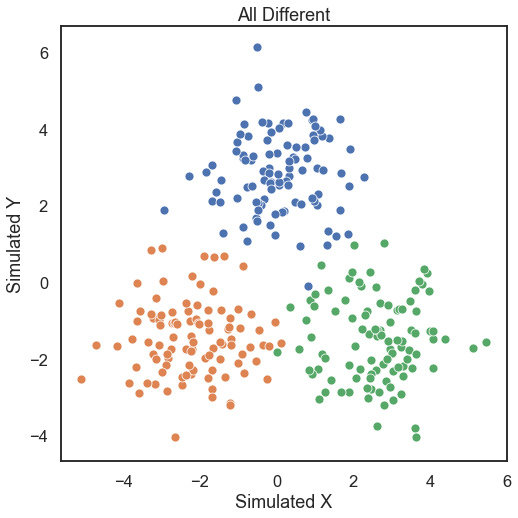

In [9]:
# hyppo code used to produce the simulation data
samp1, samp2, samp3 = gaussian_3samp(100, case=3, epsilon=5)


# stuff to make the plot and make it look nice
fig = plt.figure(figsize=(8,8))
ax = sns.scatterplot(samp1[:, 0], samp1[:, 1])
ax = sns.scatterplot(samp2[:, 0], samp2[:, 1])
ax = sns.scatterplot(samp3[:, 0], samp3[:, 1])
ax.set_xlabel('Simulated X')
ax.set_ylabel('Simulated Y') 
plt.title("All Different")
plt.axis('equal')
plt.show()

In [10]:
stat, pvalue = KSample("Dcorr").test(samp1, samp2, samp3)

print("DISCO test statistic:", stat)
print("DISCO p-value:", pvalue)

DISCO test statistic: 0.8485965561961212
DISCO p-value: 0.001
